# Project: Exploratory Data Analysis on (Bank Churn)

#### Bank Churn Dataset
- How can we reduce the time that they spend in the bank?
- What is the correlation? What is the strength of relationships between variables?
- How can we improve productivity at the bank?

# INTRODUCTION

Credit cards play an essential role in the banking world. As customers, we might scratch credit cards with the best offers and financial security. I use credit cards for earning air benefits, hotel reservations, food shopping discounts and welcome bonuses on various apps.

Users earn credit score and bonus rewards for every transaction. Banks hate users who use multiple credit cards and do not stick with one credit card. These users are termed as Churners. Credit card churning involves closing cards after the bonus posts to your account and before the next annual fee is charged.

Banks, Corporate finance teams, Business finance managers offer rewards on credit cards to earn advanced cash, annual fees, interest charges and in-hand money.	

PLEASE IGNORE THE LAST 2 COLUMNS (NAIVE BAYES CLAS…). I SUGGEST TO RATHER DELETE IT BEFORE DOING ANYTHING**

In [60]:
# Use this, and more code cells, to explore your data. Don't forget to add markdown cells to document your observations and findings. 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\Lenovo\Desktop\DATA ANALYTICS\Capstone 2\BankChurners.csv')
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,0,45,Male,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,0,49,Female,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,0,51,Male,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,0,40,Female,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,0,40,Male,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Shape Function gives the rows and columns number

In [61]:
print(df.shape)

(10127, 23)


# Prints information of all columns

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  int64  
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

# Deleting last two columns

In [63]:
df = df.drop(columns=df.columns[-2:])
print(df)

       CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0      768805383               0            45    Male                3   
1      818770008               0            49  Female                5   
2      713982108               0            51    Male                3   
3      769911858               0            40  Female                4   
4      709106358               0            40    Male                3   
...          ...             ...           ...     ...              ...   
10122  772366833               0            50    Male                2   
10123  710638233               1            41    Male                2   
10124  716506083               1            44  Female                1   
10125  717406983               1            30    Male                2   
10126  714337233               1            43  Female                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        

In [64]:
df[df.duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


# Checking the missing values

In [65]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

There is no missing values. Data is clean.

<a id='eda'></a>
## Exploratory Data Analysis

> Now you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. Look at one variable at a time, and then follow it up by looking at relationships between variables.

- Include atleast 6-7 visualizations
- The EDA should include both single-variable (1d) and multiple-variable (2d) explorations. 
- The project's visualizations should be varied and show multiple comparisons and trends. At least three kinds of plots(eg. histogram, box plot, line plot, bar plot, etc) should be created as part of the explorations.
- Please make sure reasoning is provided for each analysis decision, plot, and statistical summary.
- Visualizations made in the notebook, should depict the data in an appropriate manner (i.e., has appropriate axis labels, scale, legends, and title) that allows plots to be readily interpreted.

## Question 1 
### How can we reduce the time that they spend in the bank? 


#### Select all the columns with data type 'object' from the dataframe and returning the list of column labels of those columns.

In [66]:
list(df.select_dtypes(['object']).columns)

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

#### Attrited Customer=1, Existing Customer= 0

In [67]:
df['Attrition_Flag'].value_counts(normalize=True)* 100

0    83.934038
1    16.065962
Name: Attrition_Flag, dtype: float64

#### We have only 16.07% of customers who have churned. Let's calculate numerical data percentages for each category.

In [68]:
df['Attrition_Flag'].value_counts(normalize=True)* 100

0    83.934038
1    16.065962
Name: Attrition_Flag, dtype: float64

#### Female customer is %52.90, male customer is %47.09. We have more female customers.

In [69]:
df['Gender'].value_counts(normalize=True)* 100

Female    52.908068
Male      47.091932
Name: Gender, dtype: float64

#### Most of our customer is graduated which is great.

In [70]:
df['Education_Level'].value_counts(normalize=True)* 100

Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     5.095290
Doctorate         4.453441
Name: Education_Level, dtype: float64

#### Married people percentage is 46.28.

In [71]:
df['Marital_Status'].value_counts(normalize=True)* 100

Married     46.282216
Single      38.935519
Unknown      7.396070
Divorced     7.386195
Name: Marital_Status, dtype: float64

#### %35 of our customer makes less than $40k a year.

In [72]:
df['Income_Category'].value_counts(normalize=True)* 100

Less than $40K    35.163425
$40K - $60K       17.675521
$80K - $120K      15.157500
$60K - $80K       13.844179
Unknown           10.980547
$120K +            7.178829
Name: Income_Category, dtype: float64

#### %93.17 of our customer has blue card. Only %0.19 has the platinum card. 

In [73]:
df['Card_Category'].value_counts(normalize=True)* 100

Blue        93.176656
Silver       5.480399
Gold         1.145453
Platinum     0.197492
Name: Card_Category, dtype: float64

#### Let's dive into to see all numerical categories percentages.

In [74]:
df[['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']].value_counts(normalize= True)* 100

Attrition_Flag  Gender  Education_Level  Marital_Status  Income_Category  Card_Category
0               Female  Graduate         Married         Less than $40K   Blue             3.831342
                                         Single          Less than $40K   Blue             2.982127
                        High School      Married         Less than $40K   Blue             2.379777
                Male    Graduate         Married         $80K - $120K     Blue             1.915671
                Female  High School      Single          Less than $40K   Blue             1.905796
                                                                                             ...   
1               Male    College          Unknown         $40K - $60K      Blue             0.009875
                                                         $80K - $120K     Blue             0.009875
0               Male    Graduate         Married         $60K - $80K      Platinum         0.009875
            

## Question 2
### What is the correlation? What is the strength of relationships between variables?

### Correlation 

<AxesSubplot:>

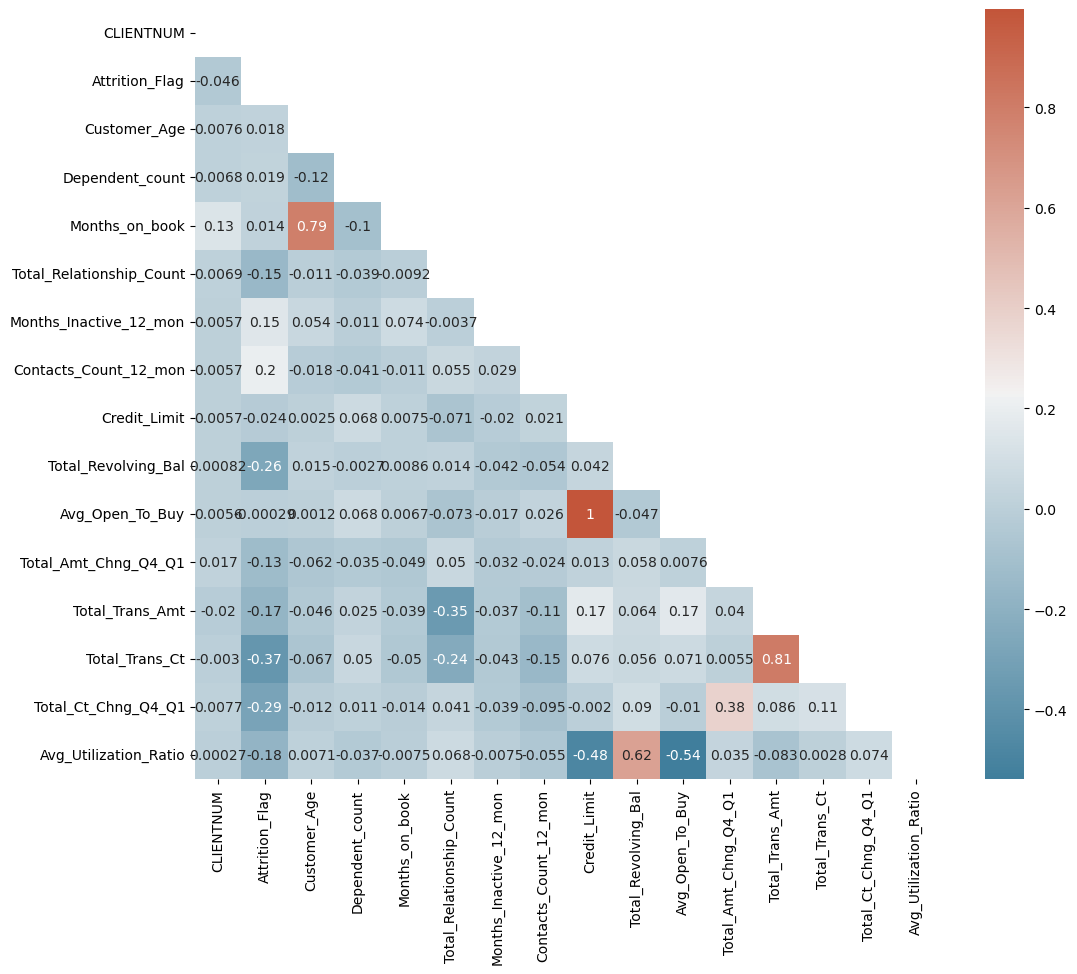

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)


- Variables such as Total_Trans_Amt & Total_Trans_Ct, Customer_Age & Months_on_book, and Avg_Utilization_Ratio & Total_Revolving_Bal are having strong positive correlation. 
- Variables such as Avg_Open_To_Buy & Avg_Utilization_Ratio, and Credit_Limit & Avg_Utilization_Ratio are having strong negative correlations.
- There are several variables that have no correlation and whose correlation value is near 0.

## What are the statistics on numerical data?

In [76]:
round(df.describe(exclude = 'object'), 2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,7.391776e+08,0.16,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27
std,3.690378e+07,0.37,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28
min,7.080821e+08,0.00,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,7.130368e+08,0.00,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02
50%,7.179264e+08,0.00,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18
75%,7.731435e+08,0.00,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50
max,8.283431e+08,1.00,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00


- As we can see customer age mean is 46.33 years. Their credit limit mean is 8631.95 dollars. Total revolving balance mean is 1162.81 dollars. 
- Standard deviaton of the customer age is 8.02. The credit limit standard devation is 9088.78 dollars. Dependent count standard devation is 1.30.
- Our oldest customer is 73 years old. Maximum credit limit of our customer is 34516 dollars. Maximum total revolving balance is 2517.00 dollars. 

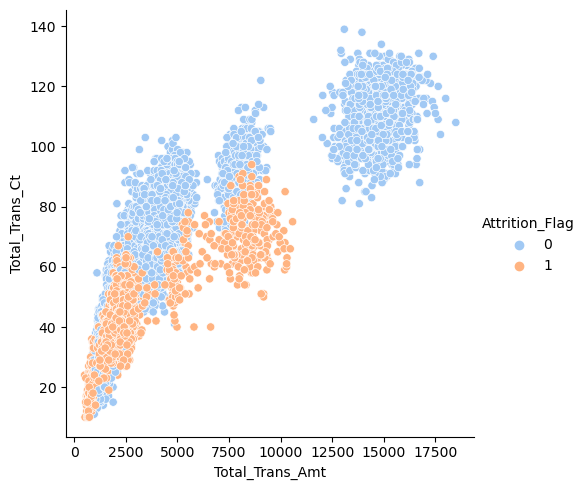

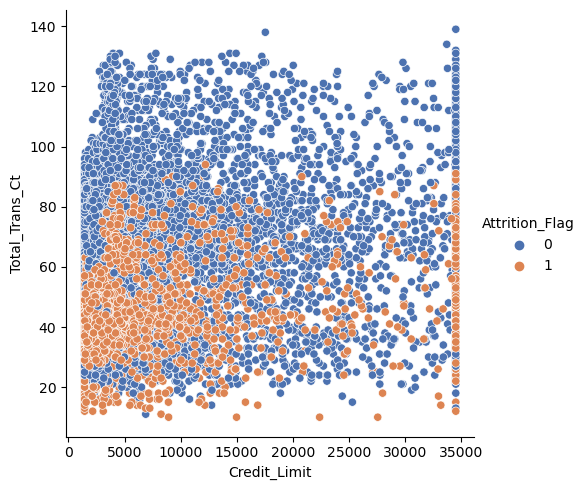

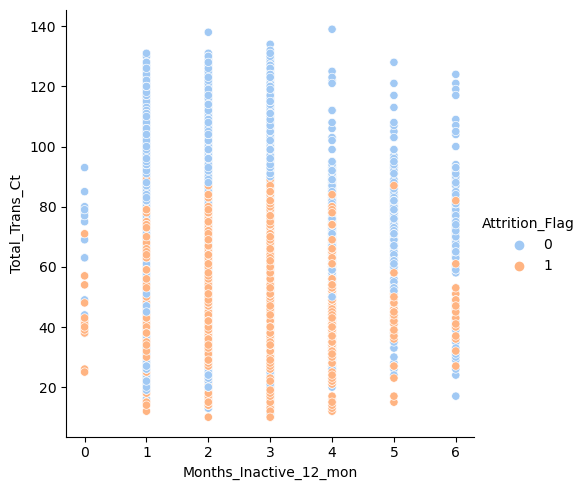

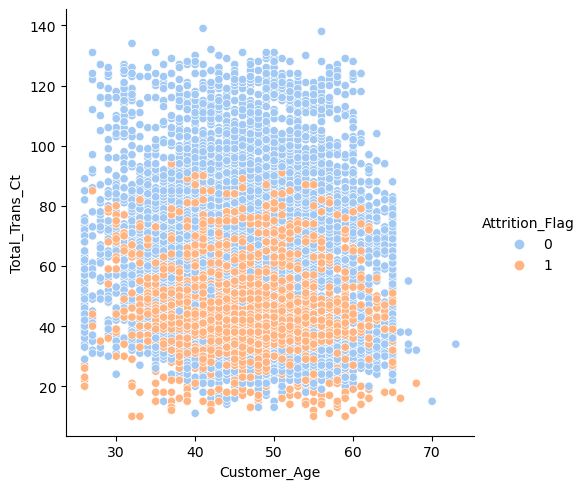

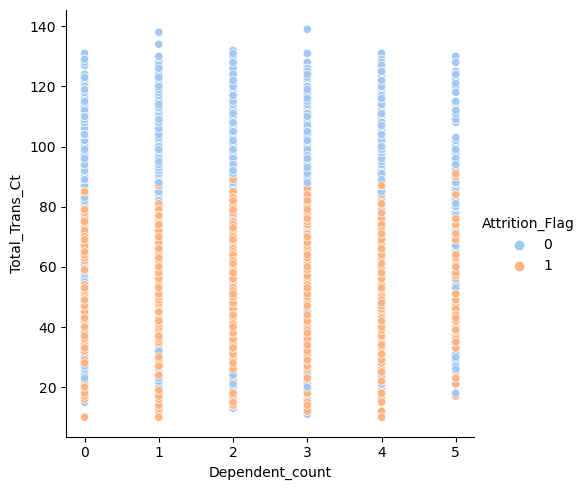

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("pastel")
sns.relplot(data=df, x= 'Total_Trans_Amt' , y = 'Total_Trans_Ct', hue = 'Attrition_Flag', kind='scatter')
sns.relplot(data=df, x = 'Credit_Limit' , y = 'Total_Trans_Ct', hue = 'Attrition_Flag', palette="deep", kind='scatter')
sns.relplot(data=df, x = 'Months_Inactive_12_mon' , y = 'Total_Trans_Ct', hue = 'Attrition_Flag', kind='scatter')
sns.relplot(data=df, x = 'Customer_Age' , y = 'Total_Trans_Ct', hue = 'Attrition_Flag', markers='"+"', kind='scatter')
sns.relplot(data=df, x = 'Dependent_count' , y = 'Total_Trans_Ct', hue = 'Attrition_Flag', kind='scatter')

1. Customer Age is clustered. It shows that every age can churn. 
2. Customers who have the highest credit limit stay longer 
3. Customers with the highest transaction amount stay longer
4. Dependent count chart shows that it does not matter how many dependents you have 
5. Churned customers utilized credit cards less than 90 times in 4 months.




### We can see that Man' credit limit is higher than the Female'.

In [83]:
fig = px.histogram(df, x="Credit_Limit", title = "Credit Limit Distribution",color="Gender")
fig.update_layout(bargap=0.1)
fig.show()

## Statistics on Categorical Data

In [84]:
round(df.describe(exclude = ['float', 'int64']),2)

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127
unique,2,7,4,6,4
top,Female,Graduate,Married,Less than $40K,Blue
freq,5358,3128,4687,3561,9436


- As we can see on the chart Blue card holder number is 9436 out of 10127. Additionally, 3561 customer makes less than $40k.

## Question 3
### How can we improve productivity at the bank?

In [85]:
df_demographics= pd.concat([df[['Gender','Education_Level','Marital_Status','Income_Category','Customer_Age', 'Attrition_Flag']]],axis=1)
df_demographics.head(5)

,Gender,Education_Level,Marital_Status,Income_Category,Customer_Age,Attrition_Flag
0,Male,High School,Married,$60K - $80K,45,0
1,Female,Graduate,Single,Less than $40K,49,0
2,Male,Graduate,Married,$80K - $120K,51,0
3,Female,High School,Unknown,Less than $40K,40,0
4,Male,Uneducated,Married,$60K - $80K,40,0


In [86]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

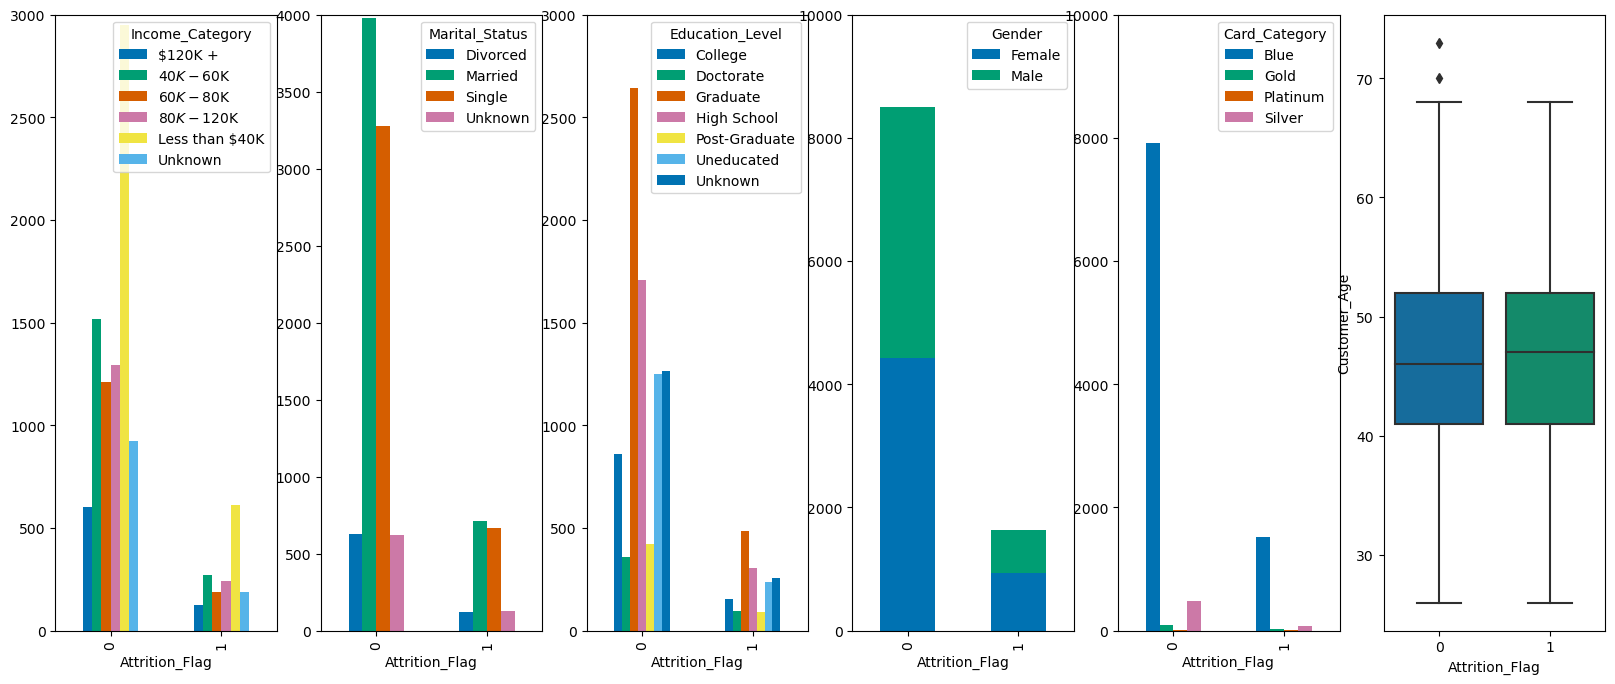

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
fig , ( ax, ax2, ax3, ax4, ax5 , ax6 ) = plt.subplots(ncols = 6, 
                                          figsize = (20,8))
plt.style.use('seaborn-colorblind')

## Bar Charts for categorical features

crosstab=pd.crosstab(df['Attrition_Flag'],df['Income_Category']).plot(kind = 'bar', ax = ax, ylim = [0,3000])

crosstab=pd.crosstab(df['Attrition_Flag'],df['Marital_Status']).plot(kind = 'bar', ax = ax2, ylim = [0,4000])

crosstab=pd.crosstab(df['Attrition_Flag'],df['Education_Level']).plot(kind = 'bar', ax = ax3, ylim = [0,3000])

crosstab=pd.crosstab(df['Attrition_Flag'],df['Gender']).plot(kind = 'bar',ax = ax4, stacked= True, ylim = [0,10000])

crosstab=pd.crosstab(df['Attrition_Flag'],df['Card_Category']).plot(kind = 'bar', ax = ax5, ylim = [0,10000])

boxplot = sns.boxplot(data = df_demographics, x = 'Attrition_Flag', y = 'Customer_Age', ax = ax6)

## Conclusions

1.Boxplot shows equal churned and non-churned customers. When the median is in the middle of the box, and the whiskers are about the same on both sides, then the distribution is symmetric.

2.As we see on the Gender chart, the gender distribution of the customers is almost the same percentage.

3.When we check the card category, we can see most of our customers use Blue cards. It is the primary card. How can we increase our other card options for high-income customers?

4.Most of the existing customers make less than 40k dollars a year. They may get a Blue card and spend less money. We should focus on the 40-60k dollars range, plus who make more than 120k dollars. 

5.%31 of our customers' education level is "Graduate." Additionally, %20 of our customers graduate from high school. It means that they know basic finance and economics. 

6.Average customer age is 46 and customer limit is 8632 dollars.

7.The married couple percentage is 46; however, the single-person ratio who use the credit card is 39. We can make more offers for married couples.
